 $\renewcommand{\ket}[1]{|#1\rangle}$

# Shor's Algorithm for Integer Factorization

It is a quantum algorithm for composite integer factorization with polynomial time complexity developed by Peter Shor in 1994.

## PROBLEM: 
**Given an composite integer M, find its factors**

**Restatement**:
A composite integerM = $P_1^{p_1} P_2^{p_2} . . . P_n^{p_n}$ , where $P_𝑖$’s are primes and $p_i$'s are their respective powers. Decomposing M into ${ P_1, P_2, . . . P_𝑛}$ is a composite number factorization. For simplicity we use 𝑀=𝑝.𝑞

It is a difficult task to complete but easy to check. Classically, the complexity class of integer factorization problem is NP(non po

## Classical Solutions
1. Check values : 1<𝑥<𝑀 , if x exactly divides M , for worst case, complexity :$𝑂(𝑀)= 𝑂(2^𝑤 )$. where $w=log(M)$
2. Check values : 1<𝑥<√𝑀, complexity : $𝑂(2^{𝑤/2} )$
3. Best known algorithm : General Number Field Sieve (GNFS) 
    Complexity $\mathbf{
O\left(exp\left(c(\log M )^ {\frac{1}{3}} (\log \log M)^ {\frac{2}{3}} \right)\right)}
$

Here all these solution are exponential or subexponential. So, factorization is Non-Polynomial Problem (NP) classically. lyShor's algorithm use the advantage of superposition, entanglement, quantum fourier transform to increse efficiency of the task, reducing the complexity from Non-Polynomial to Bounded-Error Polynomial problem. nomial).

Using Quantum cthe problemputation, it is included in a new complexity class called BQP(Bounded Error Quantum Polynomial). It uses Quantum Fourier Transform and Modular exponentiation by repeated squaring that increased it efficiency conpared to other classical

### Comparision between classical algorithm and Shor's algorithm
ref: $https://colab.research.google.com/drive/1XmRW8KLqIGB4SY9Nyu7SFvSeBcmP5Nm9?usp=sharing $

<div>
 
<img src="Images/Complexity_shor_vs_sieve.png" width="720"/>
</div>

## Shor’s Factoring Algorithm

Say M be a composite odd integer and $M ≠𝑝^𝑘$, for prime p

1. Choose a random number : $1<𝑥<𝑀 = 𝑝.𝑞$

2. If $GCD(𝑥, 𝑀)  ≠1$, then factor = $GCD(𝑥, 𝑀)$  where GCD  = greatest common divisor

3. If $gcd⁡(𝑥, 𝑀)=1$, find period, a of function 

    $𝑓(𝑟)= 𝑥^𝑟$  𝑚𝑜𝑑 𝑀          , $𝑟∈ℤ(𝑀)$

4. If period: a is odd or $𝑥^{𝑎/2}=−1 (𝑚𝑜𝑑𝑀)$, we restart the algorithm from step 1

5. If a is even and $𝑥^{𝑎/2}\neq1 (𝑚𝑜𝑑𝑀)$ then, factors of M are: 
    $𝑝=𝐺𝐶𝐷(𝑥^{𝑎/2}+1, 𝑀)$ and  $𝑞=𝐺𝐶𝐷⁡(𝑥^{𝑎/2}−1, 𝑀)$


### Example
- Let M=15 , x= 3 then GCD(3,15)=3(doesnot satisfies the necessary condition)
- Choose another x, x=2, then GCD(2,15)=1
- Compute f(r)=2^r(mod 15) for r$\leq$ (15) 

        eg, f(0)=1(mod 15)=1, f(1)=2(mod 15)=2, f(2)=4(mod 15)=4, f(3)=8(mod 15)=8, f(4)=16(mod 15)=1
- f(r)= 1, 2, 4, 8, 1, 2, 4, 8, 1, 2, 4, 8,1, 2, 4
- We can see the period, a is 4
- Factors are $𝐺𝐶𝐷(2^{4/2}+1,15)$ and $𝐺𝐶𝐷(2^{4/2}-1,15)$= 
        𝐺𝐶𝐷(5,15)= 5, 𝐺𝐶𝐷(3,15)= 3  
- Factors= 5 and 3

<div>
 <img src="Images/periodicfunction(2,15).png" width="500"/>
</div> 

## Classical Implementation

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

x=  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
f(x)=  [ 1 11  1 11  1 11  1 11  1 11  1 11  1 11  1 11]


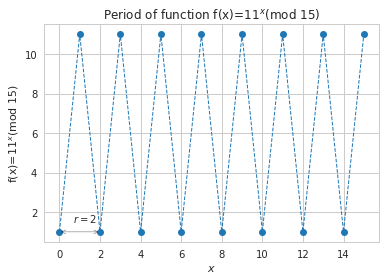

None

In [3]:
''' We set the integer to be factored to be 15, then we choose a=2 and compute the result and plotted the result offunction f(x) = a^x mod I'''
# Initializating inputs: N=16, integer:I =15, a=2N
N=16
I=15
a=11

def periodfind(x,I,N):  #  find all values of f(a)=x^a mod I from 1 to N
    arr=[]
    for i in range(N):
        f= (x**i)%(I)
        arr.append(f)
    return arr

y=np.array(periodfind(a,I,N))
x=np.arange(N)
print("x= ", x)
print("f(x)= ", y)
# plotting
plt.style.use('seaborn-whitegrid')
def plot_fig(xvals,yvals,a,I): # to make the plot nice
    yvals=list(yvals)
    fig, ax = plt.subplots()
    ax.plot(xvals, yvals, linewidth=1, linestyle='--', marker='o')
    ax.set(xlabel='$x$', ylabel='f(x)=${a}^x$(mod {I})'.format(a=a,I=I),
           title='Period of function f(x)=${a}^x$(mod {I})'.format(a=a,I=I))
    try: # plot r on the graph
        r = yvals[1:].index(1) +1 
        plt.annotate(s='', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'))
        plt.annotate(s='$r=%i$' % r, xy=(r/3,1.5))
    except:
        print('Could not find period, check a < N and have no common factors.')
    display(plt.show())
plot_fig(x,y,a,I)

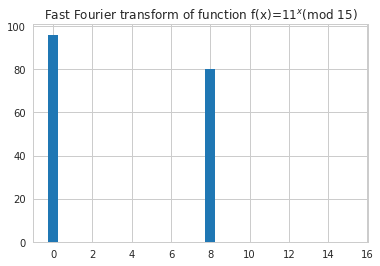

None

[0, 8]
Period is 1/(a/N) is  2 (N=16)


In [4]:
''' Now that we find the values of F(x), the task remains is to find the period of the function. For that we use, fourier transform specificly fast fourier transform of the above function(or the discrete values of the function.'''

from scipy.fft import fft
z=fft(y)  #Apply Fast fourier Transform

# plotting
plt.style.use('seaborn-whitegrid')
plt.title('Fast Fourier transform of function f(x)=${}^x$(mod {})'.format(a,I))
plt.bar(x,np.abs(z),width=0.5)
display(plt.show())

# find period
finalval=[]
output = dict(zip(x,np.abs(z)))
for key in output.keys():
    if output[key]>np.average(np.abs(z)):
        finalval.append(key)
print(finalval)
period = int(1/(np.gcd.reduce(finalval)/N))

print('Period is 1/(a/N) is ',period,"(N=16)")

![num loops vs bit length](Images/nuum_loops_vs_bits.png)


# Implementation on Quantum Computer $\text{(Formal generalization)}$
1. Initialize two quantum register $\ket0^n\ket1^r$
 $$ \ket{\Psi_1} = \ket{0}^n \ket{1}^r  where N=2^𝑛  :𝑀^2<𝑁 <2𝑀^2$$
2. Prepare uniform superposition by applying Hadamard gates( $H^{\otimes n} $ )in first register
$$\ket{\Psi_2} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \ket{x} \ket{1}$$
3. We apply the periodic function $𝑓(𝑥)=𝑦^𝑥 (𝑚𝑜𝑑 M)$ on second register
$$\ket{\Psi_3} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \ket{x} \ket{f(x)}$$
$$\rightarrow \ket{\Psi_3} = \frac{\hat{m}}{N} \sum_{x=0}^{a-1}(\frac{1}{\sqrt{\hat{m}}} \sum_{j=0}^{\hat{m}-1} (x+ja) ) \ket{x}^n \ket{f(x)}^r$$

4. Conceptually measure second qubit at 𝑓(𝑥_0 ) and collapse superposition of 1st register(optional).
$$ \ket{\psi_4} = \frac{1}{\sqrt{\tilde{m}}} \sum_{j=0}^{\tilde{m} -1} \ket{x_0 + ja}$$

5. Apply QFT on first register to obtain the frequency of the superimposed state in 1st register
$$\ket{\Psi_5} = \frac{1}{\sqrt{\hat{m}} N } \sum_{j=0}^ {\hat{m}-1} w^{(x_0+j a)y} \ket{y}^n        = \frac{1}{\sqrt{\hat{m}} N} \sum_{y=0}^{N-1} w^{x_0 y} \sum_{j=0}^{\hat{m}-1} w^{j a y} \ket{y}^n $$

6. Measure first register to obtain different values of 𝑦.
    A set $\{y_c\}_{c=0}^{\hat{m}+1}$ is more likely to be measured than others, such that each $y_c$ associated with $\{\frac{c}{a}\}_{c=0}^{a-1}$

7. Apply Continued Fraction algorithm on $𝑦_𝑐/𝑁$  to determine 𝑐/𝑎 (Classical)

8. Use Euclidean algorithm to find 
$$\frac{1}{a}=𝐺𝐶𝐷(\{\frac{c}{a}\}_{𝑐=0}^{𝑎−1} )$$

9. Determine period(a). Then find factors classically





In this lecture, We will use a technique constructed by Michael R. Geller's & Zhongyuan Zhou in their [paper](https://doi.org/10.1038/srep03023) to factorize certain numbers as products of [fermat's primes](https://en.wikipedia.org/wiki/Fermat_number) (in form $2^{2^k}+1$).

We will factor: $$15=3*5$$

This is of course cheating that is we already know what the factors are. However our goal is a proof of the concept that Shor's algorithm actually works.

- According to the technique,we should have n counting register such that $\;N=2^𝑛, \;m<N$ should suffice. So n=4

- Also our f(x) only has two values '1' and '11'. So having 2 qubit for period register will do.

- In our problem, we apply reduced or compiled version of controlled-U to reduce the complexity and also reduce the number of gates and qubits needed.

In [9]:
#import packages
from qiskit import IBMQ
from qiskit import QuantumCircuit, Aer, transpile, assemble, QuantumRegister, ClassicalRegister,execute
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_histogram
from numpy.random import randint
import pandas as pd
from fractions import Fraction
IBMQ.load_account()

pi = np.pi

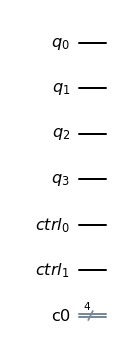

In [10]:
# create QuantumCircuit with 4 counting register and 2 control register
qc_q = QuantumRegister(4, 'q') #Initialize the Counting Register
qc_c = QuantumRegister(2, 'ctrl') #Initialize the period Register
c = ClassicalRegister(4) #Register which will eventually hold measurements
Shor = QuantumCircuit(qc_q, qc_c,c)

Shor.draw(output='mpl',fold=1,scale=1)

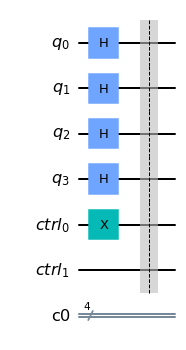

In [11]:
Shor.h(qc_q[0:4]) #Initialize 4 Hadamard Gates to allow for all possibilities
Shor.x(4) # It is common convention to add a not gate before Modular Exponentiation
Shor.barrier()
Shor.draw(output='mpl',fold=1,scale=1)

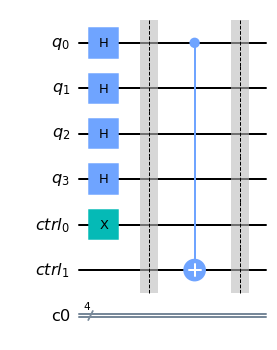

In [12]:
#This is a compiled version of modular exponentiation that will not generalize outside of fermat primes.
# Shor.cx(qc_q[0],qc_c[0]) 
Shor.cx(qc_q[0],qc_c[1])
Shor.barrier()
Shor.draw(output='mpl',fold=1,scale=1)

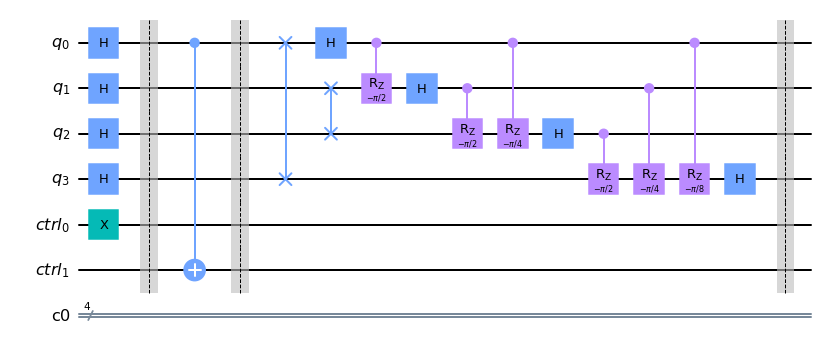

In [13]:
# Apply inverse Quantum Fourier Transform
# Swap gates can be ommited by classically swapping the order of measurments if noise is an issue.
Shor.swap(qc_q[0],qc_q[3])
Shor.swap(qc_q[1],qc_q[2])

#The Inverse Quantum Fourier Transform
Shor.h(0)
Shor.crz(-pi/2,qc_q[0],qc_q[1])
Shor.h(1)

Shor.crz(-pi/2,qc_q[1],qc_q[2])
Shor.crz(-pi/4,qc_q[0],qc_q[2])
Shor.h(2)

Shor.crz(-pi/2,qc_q[2],qc_q[3])
Shor.crz(-pi/4,qc_q[1],qc_q[3])
Shor.crz(-pi/8,qc_q[0],qc_q[3])
Shor.h(3)

Shor.barrier()
Shor.draw(output='mpl',fold=1,scale=1)

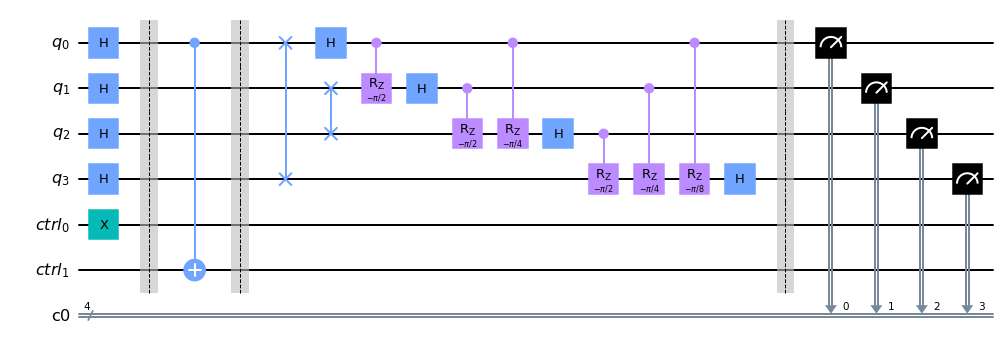

In [14]:
#Measure Working Register
Shor.measure(qc_q[0:4],range(4))
Shor.draw(output='mpl',fold=1,scale=1)


In [15]:
''' To run the circuit on real quantum device, load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits '''
N_qubit = 6

provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= N_qubit 
                                       and x.configuration().simulator 
                                       and x.status().operational==True))
print(backend)
# Uncomment this line below to run in the actual quantum computer
# backend = provider.get_backend("backend") 


ibmq_qasm_simulator


{'0000': 4125, '1000': 4067}


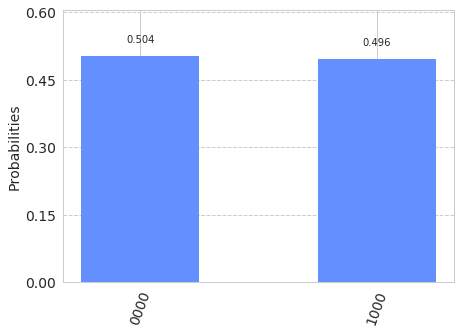

In [16]:
# running this circuit on a quantum computer
simulator = Aer.get_backend('qasm_simulator')

job = execute(Shor, simulator, shots=8192)
result = job.result()
counts = result.get_counts(Shor)
print(counts)
plot_histogram(counts)


### Running it on quantum computer gives the result:
![shor_format_prime](Images/histogram_shor_ibmq_15_02.jpg)

We can clearly see **'0'** and **'8'** has the maximum probabilities, but we also see probabilites of other values too, unlike when ran on simulator. This is due to the noises in the quantum computer.

In [29]:
output=[]
for keys in list(counts.keys()):
  output.append(int(keys,2))
print('The values with maximum probabilities are: {}'.format(output))
output.remove(0) 


The values with maximum probabilities are: [0, 8]


[8]

## Classical Analysis

In [30]:
# Classical analysis of result(classical)
N=2**4 # number of qubits in working register n=4
print(output)
y_over_N=[out/N for out in output]
print('y over N is',y_over_N)
print(output)

[8]
y over N is [0.5]
[8]


In [31]:
def find_period(output):
    y_over_N=[out/N for out in output ]
    from fractions import Fraction
    temp=[]
    num=len(y_over_N)
    for i in range(num):
        temp.append(Fraction(y_over_N[i]).limit_denominator(N))
        temp[i]=Fraction(temp[i].denominator,temp[i].numerator)
    return temp[i].numerator

a= find_period(output)
print('The period of the function is ',a)

The period of the function is  2


In [38]:
# find factors by taking GCD
from math import gcd
factors=[]

if (a/2)-(a//2)==0: # test if (a/2) is integer
    p=int(a/2)
    factors.append(gcd(11**p+1,15))
    factors.append(gcd(11**p-1,15))                  
print(factors)

[3, 5]


- Factors are $𝐺𝐶𝐷(11^{2/2}+1,15)$ and $𝐺𝐶𝐷(11^{2/2}-1,15)$= 
        𝐺𝐶𝐷(10,15)= 5, 𝐺𝐶𝐷(12,15)= 3  
- Factors= 5 and 3

In [39]:
# General Implementation of Shor's Algorithm
# Using Qiskit library
from qiskit.aqua import QuantumInstance
from qiskit.algorithms import Shor

/home/namahyp/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [113]:
n= 15
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
shor = Shor(quantum_instance=quantum_instance)
result = shor.factor(n)
print(f"The list of factors of {n} as computed by the Shor's algorithm is {result.factors[0]}.")

The list of factors of 16 as computed by the Shor's algorithm is [3, 5].


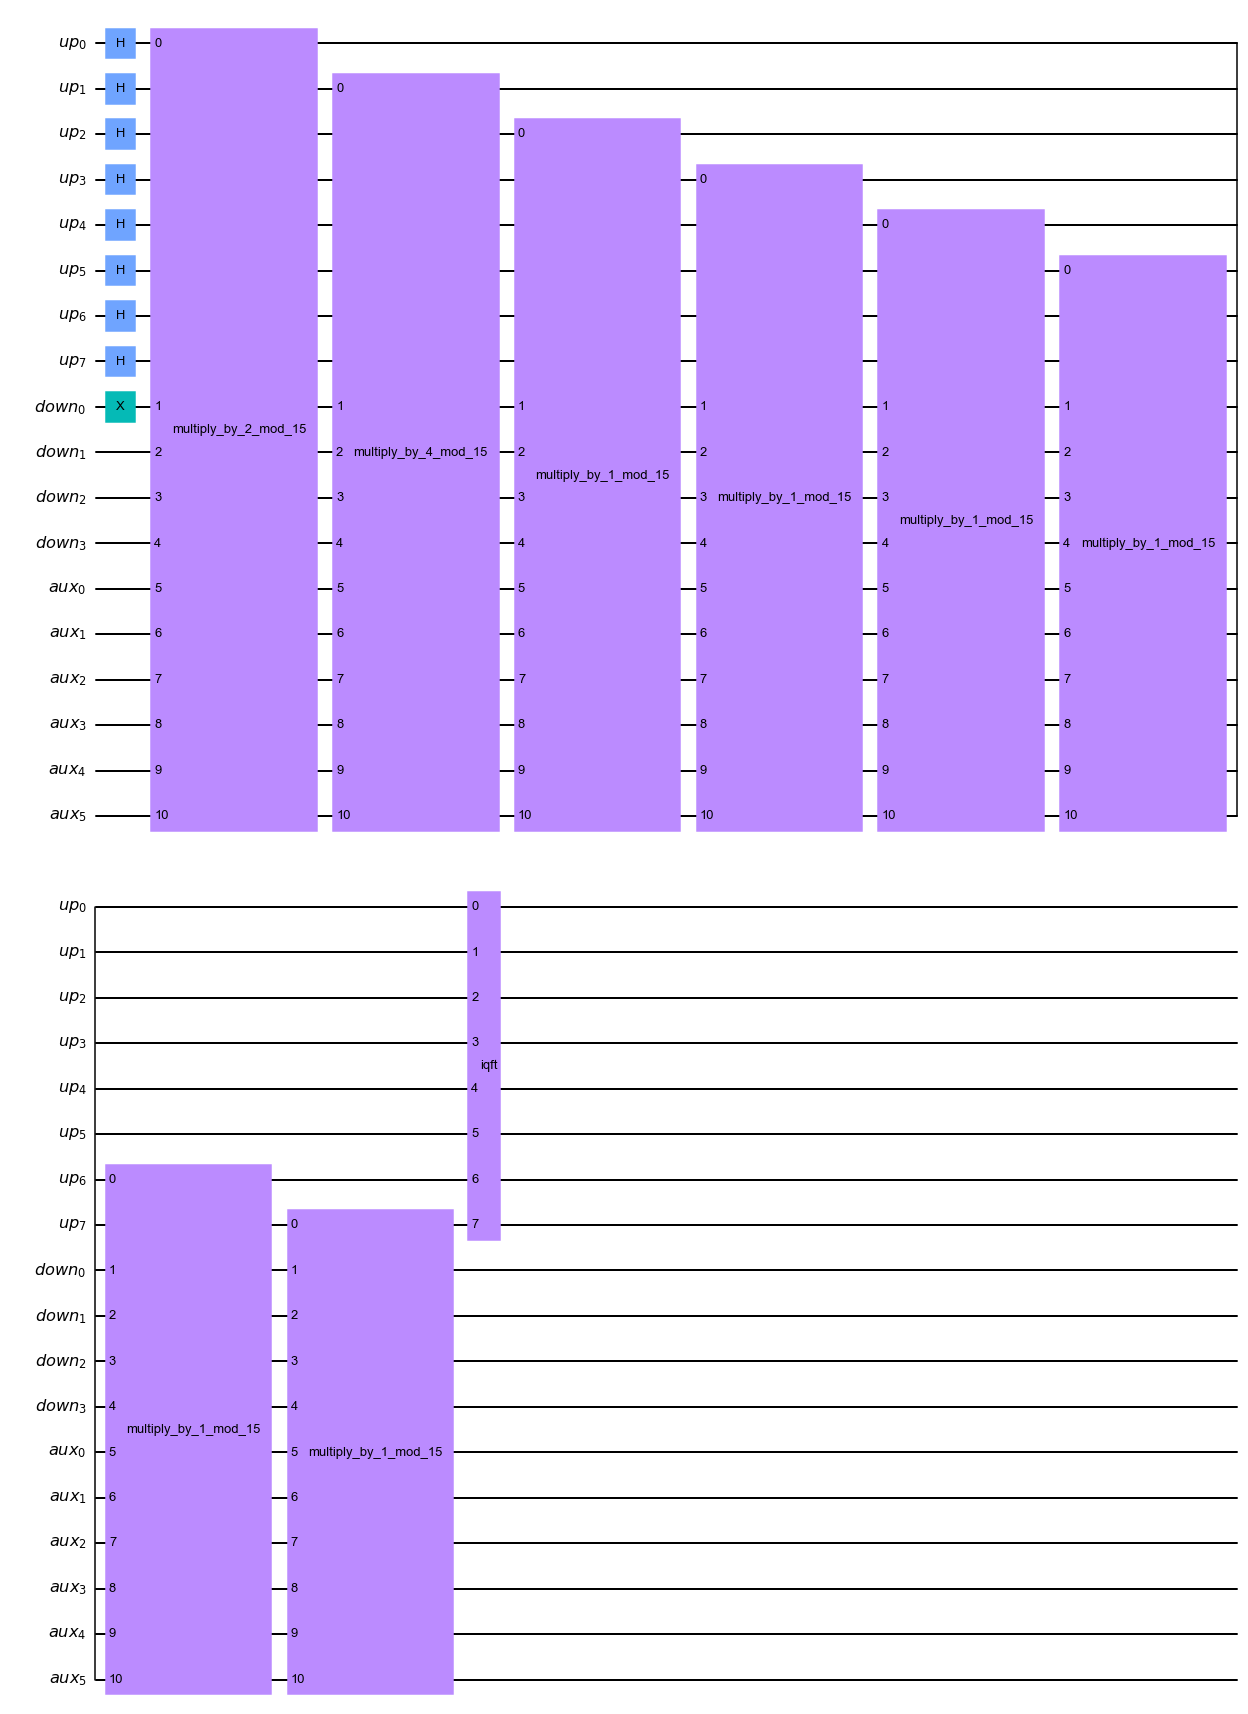

In [115]:
qc_shor=shor.construct_circuit(n)
qc_shor.draw('mpl')

## Applications: RSA Cryptosystem Breaking
### Introduction:
Securing information transmission and communication by scrambling(encryption) and unscrambling(decryption) the information or signal using a key(cipher) is cryptography. RSA cryptography is a public-key cryptosystem. Public key cryptography uses two keys: a public key and a private key.  Alice encrypts the message using a public key which is available publicly and sends it to Bob.  The private key associated with the public key is used to decrypt the message.

RSA cryptosystem is one of the first public-key cryptographic systems. It was developed by Ronald Rivert, Adi Shamir, and Leonard Adleman in 1977. It is based on the difficulty of the prime factorization problem. This cryptosystem is used in different web browsers, emails, banking transactions, and for secured communication. It is implemented in many cryptographic libraries like OpenSSL, wolfCrypt, and others.

### Working
1. Take a large composite integer I with prime decomposition $I=p.q$.
2. Generate public key: Compute $\lambda$=lcm(p-1,q-1) and choose an integer $a < \lambda$ coprime to $\lambda$, Then
        
        public key = (a, I)
3. Encryption: Say 'm' be the message at Alice to send to BoB, Alice prepare encrypted message 'e' using public key as:
        $$e = m^a \; mod \;I$$
4. Generate public Key: 

        If Bob knows the factors p,q, compute for b such that 
$$b= e^{-1}\; mod\; \lambda$$
        Private key = (b,n)
5. Decryption: Bob use the private key to decrypt the message as:
$$m= e^b \; mod \; I$$
        
Shor's algorithm factors pose a threat to RSA cryptosystem as it's basic principle lie in the belief or statement that large integer are exponentially hard to factorize. Like in above example, if any person with malicious intent find the public key, they can generate private key.

 Researchers argue a 2018 bit key that takes 300 trillion years for a classical computer to break, can be broken by a for 4099 qubit quantum computer in about 10 seconds. But, the largest number yet factored by a quantum computer using Shor's algorithm is 21 because of errors and limitations of qubit

Other Applications:
- Discrete logarithm problem: DIFFI-HELLMAN Cryptographic protocol
- Breaking Bitcoin Signature: Crack ECDSA Algorithm(Elliptic Curve Digital Signature Algorithm) and forge signature


### Conclusion
If an integer can be factored easily, RSA cryptography can be broken. But The largest RSA number to be factored till now is RSA-250, which is a 250 digit long number with 829 bits. It took roughly 2700 core-years, using Intel Xeon Gold 6130. Almost all currently used RSA cryptosystem uses 1024 bit or larger numbers like RSA-2048 and RSA-4096


## References
1. Michael A Nielsen and Isaac Chuang.Quantum computation and quantuminformation.  Cambridge University Press, 2002
2. Michael Loceff.  A course in quantum computing, vol1, 2015
3. https://doi.org/10.1038/srep03023
4. https://qiskit.org/documentation/stubs/qiskit.aqua.algorithms.Shor.html
5. https://quantumcomputinguk.org/tutorials/shors-algorithm-with-code

In [40]:
import qiskit.tools.jupyter
%qiskit_version_table